In [1]:
import pandas as pd
import numpy as np
import os
from importlib import reload
import multiprocessing as mp

import matplotlib
import matplotlib.pyplot  as plt
import seaborn as sns

# locals
import loader as _load
import network_funcs as _network

In [2]:
ROOT_DIR = "/nfs/turbo/umms-indikar/shared/projects/cstansbu_rotation/DeWitt_data/"

In [18]:
%time

"""
load a dataset into memory
"""

reload(_load)
N_ROWS = None
SAMPLE_SIZE = 100
N_SAMPLES = 100

# load         
sampler = _load.SequenceSampler(ROOT_DIR)
sampler.load_dir("D3-M", n_rows=N_ROWS)

# get samples
sampler.get_samples(sample_size=SAMPLE_SIZE, n_samples=N_SAMPLES)
print(len(sampler.samples))

# build distance matrices 
sampler.samples_to_distance_matrices()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
100


In [19]:
reload(_network)

def matutil_wrapper(M):
    """make these operations parallelizable"""
    mat = _network.MatUtil(M)
    mat.to_adj(tolerance=np.mean)
    F = mat.get_fiedler_number()
    E = mat.get_von_Neumann_Entropy()    
    return {'Fiedler value' : F,
            'Von Neumann entropy': E}
    
# matutil_wrapper(sampler.matrices[0])
    
# MAKE PARALLEL!
# compute connectivity and entropy
pool = mp.Pool(36*4)
new_rows = pool.map(matutil_wrapper, sampler.matrices)
memory = pd.DataFrame(new_rows)
memory.head()

,Fiedler value,Von Neumann entropy
0,0.841279,4.591935
1,0.844980,4.592082
2,0.835474,4.591938
3,0.821607,4.591503
4,0.803512,4.591807


Text(0.5, 1.0, 'memory')

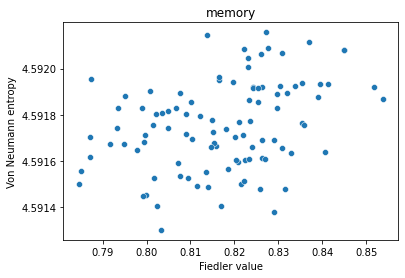

In [20]:
# plot results
sns.scatterplot(data=memory,
                x='Fiedler value',
                y='Von Neumann entropy')

plt.title("memory")

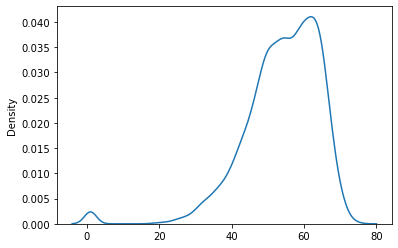

In [21]:
sns.kdeplot(sampler.matrices[0].flatten())

In [7]:
break

SyntaxError: 'break' outside loop (<ipython-input-7-6aaf1f276005>, line 1)

In [ ]:
"""
same donor; but naive sequences
"""

sampler = _load.SequenceSampler(ROOT_DIR)
sampler.load_dir("D3-N", n_rows=N_ROWS)
sampler.get_samples(sample_size=SAMPLE_SIZE, n_samples=N_SAMPLES)
sampler.samples_to_distance_matrices()
pool = mp.Pool(36*4)
new_rows = pool.map(matutil_wrapper, sampler.matrices)
naive = pd.DataFrame(new_rows)

In [ ]:
sns.scatterplot(data=naive,
                x='Fiedler value',
                y='Von Neumann entropy')

plt.title("naive")